# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang digunakan pada proyek ini adalah Diabetes Health Indicators Dataset, yang dapat ditemukan pada link berikut: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

# Opsi display
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ignore warnings (opsional, tapi bisa membuat output lebih bersih)
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
FILE_NAME = 'diabetes_raw.csv'
FILE_PATH = os.path.join('..', FILE_NAME) 

# Muat dataset
try:
    df = pd.read_csv(FILE_PATH, delimiter=',')
    print(f"Dataset '{FILE_NAME}' berhasil dimuat dari '{FILE_PATH}'.")
except FileNotFoundError:
    print(f"ERROR: File tidak ditemukan di '{FILE_PATH}'")
except Exception as e:
    print(f"Error tidak terduga saat memuat file: {e}")

# Tampilkan 5 baris pertama, info, dan missing values awal
if 'df' in locals():
    print("\n5 Baris Pertama Data:")
    print(df.head())
    print("\n--- Info Dataset ---")
    df.info()
    print("\n--- Missing Values Awal ---")
    print(df.isnull().sum())
    # Cek jumlah baris duplikat
    print(f"\nJumlah baris duplikat awal: {df.duplicated().sum()}")

Dataset 'diabetes_raw.csv' berhasil dimuat dari '..\diabetes_raw.csv'.

5 Baris Pertama Data:
   Diabetes_binary  HighBP  HighChol  CholCheck    BMI  Smoker  Stroke  \
0            0.000   1.000     0.000      1.000 26.000   0.000   0.000   
1            0.000   1.000     1.000      1.000 26.000   1.000   1.000   
2            0.000   0.000     0.000      1.000 26.000   0.000   0.000   
3            0.000   1.000     1.000      1.000 28.000   1.000   0.000   
4            0.000   0.000     0.000      1.000 29.000   1.000   0.000   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                 0.000         1.000   0.000    1.000              0.000   
1                 0.000         0.000   1.000    0.000              0.000   
2                 0.000         1.000   1.000    1.000              0.000   
3                 0.000         1.000   1.000    1.000              0.000   
4                 0.000         1.000   1.000    1.000              0.000   

Menggunakan info dari Kaggle, pada dataset ini terdapat 22 fitur, yaitu:

- Diabetes_binary: 0 = no diabetes 1 = prediabetes/diabetes
- HighBP: 0 = no high BP 1 = high BP
- HighChol: 0 = no high cholesterol 1 = high cholesterol
- CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
- BMI: Body Mass Index
- Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
- Stroke: (Ever told) you had a stroke. 0 = no 1 = yes
- HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
- PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes
- Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes
- Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes
- HvyAlcoholConsump: (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes
- AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
- NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
- GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
- MentHlth: days of poor mental health scale 1-30 days
- PhysHlth: physical illness or injury days in past 30 days scale 1-30
- DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
- Sex: 0 = female 1 = male
- Age: 13-level age category in 5 year increments. 1 = 18-24 9 = 60-64 13 = 80 or older
- Education: Education level scale 1-6. 1 = Never attended school or only kindergarten 2 = elementary 3 = middle school 4 = high school 5 = less than 4 years college 6 = 4 years college or more
- Income: Income scale from 1-8. 1 = less than 10,000 USD 5 = less than 35,000 USD 8 = 75,000 USD or more

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


Memulai EDA...

--- Info Dataset (Final Check) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth           

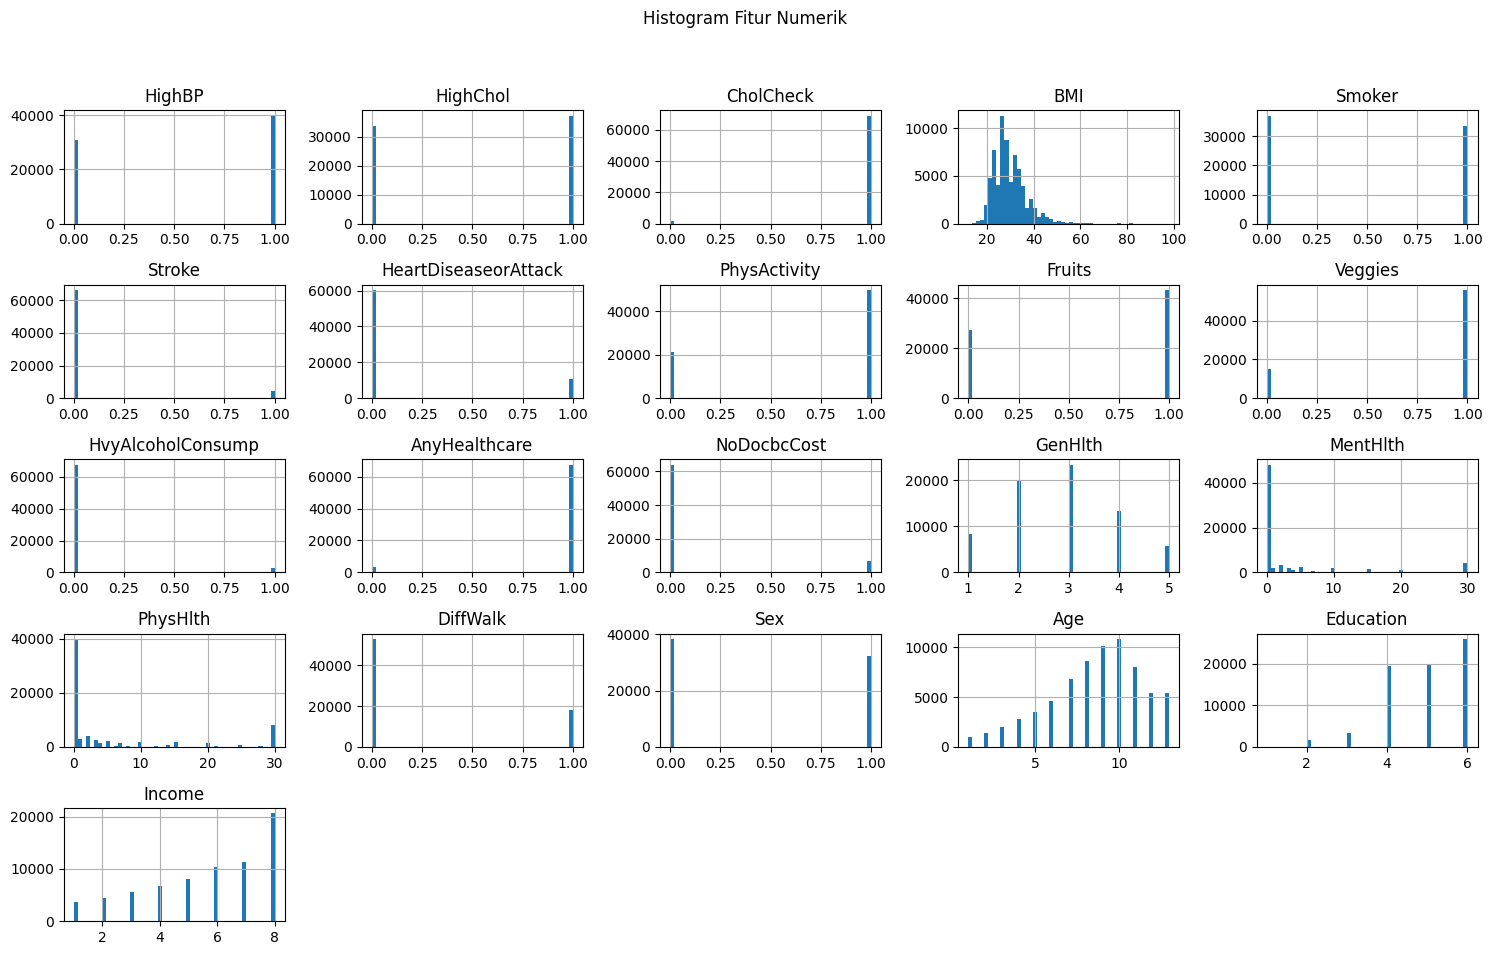


--- Distribusi Target (Diabetes_binary) ---


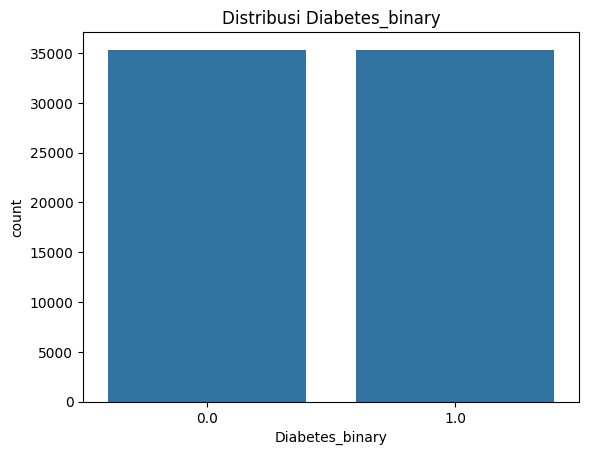

Diabetes_binary
0.000    35346
1.000    35346
Name: count, dtype: int64

--- Heatmap Korelasi ---


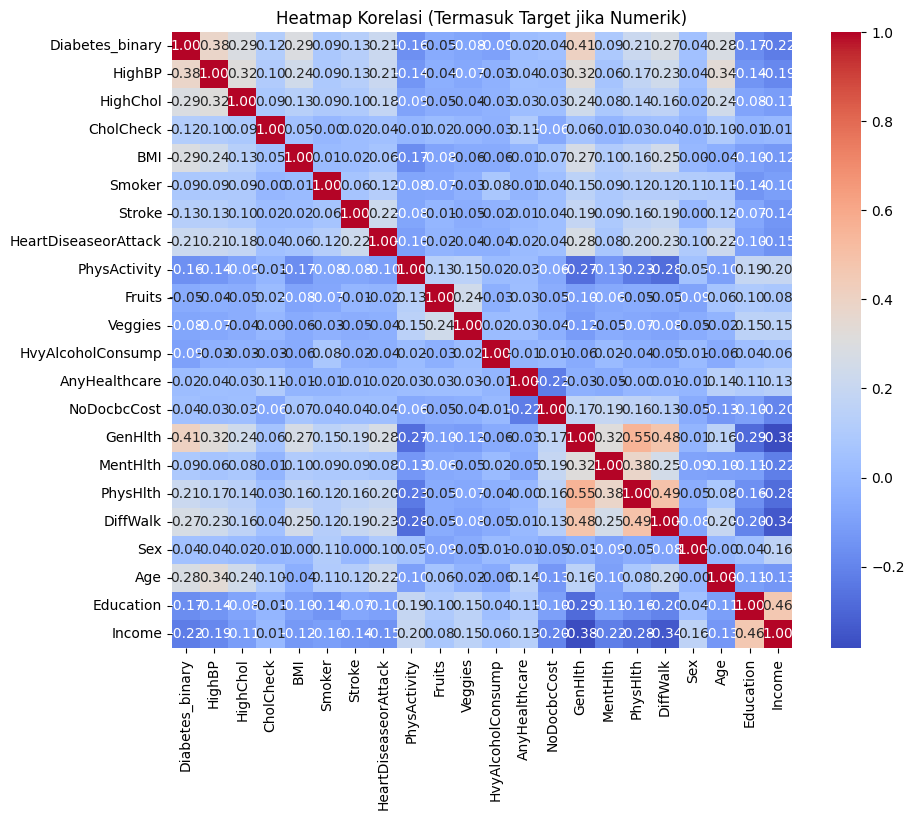

In [3]:
if 'df' in locals() and not df.empty:
    print("\n" + "="*30 + "\nMemulai EDA...\n" + "="*30)
    
    TARGET_COL = 'Diabetes_binary' 
    
    if TARGET_COL not in df.columns:
        print(f"PERINGATAN: Kolom target '{TARGET_COL}' tidak ditemukan! EDA mungkin tidak lengkap.")
        TARGET_COL = None 
        numerical_features = df.select_dtypes(include=np.number).columns.tolist()
    else:
        numerical_features = df.drop(TARGET_COL, axis=1).select_dtypes(include=np.number).columns.tolist()
        
    print("\n--- Info Dataset (Final Check) ---")
    df.info()
    
    print("\n--- Missing Values per Kolom ---")
    print(df.isnull().sum())

    print("\n--- Statistik Deskriptif ---")
    print(df.describe(include='all')) 

    print("\n--- Distribusi Fitur Numerik ---")

    if numerical_features: 
    # -------------------------
        df[numerical_features].hist(bins=50, figsize=(15, 10))
        plt.suptitle("Histogram Fitur Numerik")
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
    else:
        print("Tidak ada fitur numerik untuk di-plot.")

    if TARGET_COL and TARGET_COL in df.columns:
        print(f"\n--- Distribusi Target ({TARGET_COL}) ---")
        sns.countplot(x=df[TARGET_COL])
        plt.title(f'Distribusi {TARGET_COL}')
        plt.show()
        print(df[TARGET_COL].value_counts())

    print("\n--- Heatmap Korelasi ---")
    plt.figure(figsize=(10, 8))
    all_numeric_cols = df.select_dtypes(include=np.number).columns
    if not all_numeric_cols.empty: 
         sns.heatmap(df[all_numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
         plt.title("Heatmap Korelasi (Termasuk Target jika Numerik)")
         plt.show()
    else:
         print("Tidak ada kolom numerik untuk heatmap.")
else: 
    print("DataFrame 'df' tidak terdefinisi.")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
if 'df' in locals() and not df.empty:
    print("\n" + "="*30)
    print("Memulai Preprocessing...")
    print("="*30)
    
    df_prep = df.copy()
    
    TARGET_COL = 'Diabetes_binary' 
    
    # Pastikan kolom target ada sebelum lanjut
    if TARGET_COL not in df_prep.columns:
        print(f"ERROR: Kolom target '{TARGET_COL}' tidak ditemukan. Preprocessing dibatalkan.")
    else:
        # 1. Drop Duplicates
        len_before = len(df_prep)
        df_prep.drop_duplicates(inplace=True)
        print(f"- Data setelah drop duplikat: {len(df_prep)} (dibuang {len_before - len(df_prep)})")

        # 2. Handle Outliers (IQR) pada Fitur (KECUALI target)
        # Ambil kolom numerik selain target
        cols_to_check = df_prep.drop(TARGET_COL, axis=1).select_dtypes(include=np.number).columns
        
        print("- Penanganan Outliers (IQR) pada Fitur...")
        count_before = len(df_prep)
        for col in cols_to_check:
            # Pastikan kolom masih ada dan numerik
            if col in df_prep.columns and pd.api.types.is_numeric_dtype(df_prep[col]):
                Q1, Q3 = df_prep[col].quantile([0.25, 0.75])
                IQR = Q3 - Q1
                low, up = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
                df_prep = df_prep[(df_prep[col] >= low) & (df_prep[col] <= up)]
        print(f"- Data setelah handle outliers: {len(df_prep)} (dibuang {count_before - len(df_prep)})")

        # 3. Handle Sisa Missing Values (jika ada)
        if df_prep.isnull().sum().sum() > 0:
            len_before_na = len(df_prep)
            df_prep.dropna(inplace=True)
            print(f"- Menghapus sisa missing values: {len(df_prep)} (dibuang {len_before_na - len(df_prep)})")
        else: 
            print("- Tidak ada sisa missing values.")

        # 4. Menyimpan Hasil Preprocessing
        OUTPUT_DIR = 'diabetes_preprocessing'
        if not os.path.exists(OUTPUT_DIR): os.makedirs(OUTPUT_DIR)
        OUTPUT_FILE_NAME = 'diabetes_preprocessing.csv'
        OUTPUT_FILE_PATH = os.path.join(OUTPUT_DIR, OUTPUT_FILE_NAME)
        try:
            df_prep.to_csv(OUTPUT_FILE_PATH, index=False)
            print(f"\nPreprocessing Selesai. File disimpan di: '{OUTPUT_FILE_PATH}'.")
        except Exception as e: 
            print(f"Gagal menyimpan file CSV: {e}")
            
else: 
    print("DataFrame 'df' tidak terdefinisi.")


Memulai Preprocessing...
- Data setelah drop duplikat: 69057 (dibuang 1635)
- Penanganan Outliers (IQR) pada Fitur...
- Data setelah handle outliers: 20396 (dibuang 48661)
- Tidak ada sisa missing values.

Preprocessing Selesai. File disimpan di: 'diabetes_preprocessing\diabetes_preprocessing.csv'.
